In [1]:
import sys
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole


suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
mols = [m for m in suppl if m]


RDKit WARNING: [13:20:35]  S group DAT ignored on line 2516
RDKit WARNING: [13:20:35]  S group DAT ignored on line 2516
RDKit WARNING: [13:20:35]  S group DAT ignored on line 2516
RDKit WARNING: [13:20:35]  S group DAT ignored on line 2516
RDKit WARNING: [13:20:36]  S group DAT ignored on line 15552
RDKit WARNING: [13:20:36]  S group DAT ignored on line 15552
RDKit WARNING: [13:20:36]  S group DAT ignored on line 15552
RDKit WARNING: [13:20:36]  S group DAT ignored on line 15552
RDKit ERROR: [13:20:36] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [13:20:36] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [13:20:36] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [13:20:36] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [13:20:36]  S group GEN ignored on line 102860
RDKit ERROR: [13:20:36] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [13:20:37]  Unhand

RDKit ERROR: 
RDKit ERROR: [13:20:39] Explicit valence for atom # 8 N, 5, is greater than permitted
RDKit ERROR: [13:20:39] ERROR: Could not sanitize molecule ending on line 426332
RDKit ERROR: [13:20:39] ERROR: Explicit valence for atom # 8 N, 5, is greater than permitted
RDKit ERROR: [13:20:39] Can't kekulize mol.  Unkekulized atoms: 54 55 56 57 58 59 60 61 62
RDKit ERROR: 
RDKit ERROR: [13:20:39] ERROR: Could not sanitize molecule ending on line 427901
RDKit ERROR: [13:20:39] ERROR: Can't kekulize mol.  Unkekulized atoms: 54 55 56 57 58 59 60 61 62
RDKit ERROR: 
RDKit ERROR: [13:20:39] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [13:20:39] ERROR: Could not sanitize molecule ending on line 432118
RDKit ERROR: [13:20:39] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [13:20:39] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [13:20:39] ERROR: Could not sanitize molec

RDKit ERROR: [13:20:41] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [13:20:41] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [13:20:41] ERROR: Could not sanitize molecule ending on line 628065
RDKit ERROR: [13:20:41] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [13:20:41] Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: [13:20:41] ERROR: Could not sanitize molecule ending on line 636938
RDKit ERROR: [13:20:41] ERROR: Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: [13:20:41] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [13:20:41] ERROR: Could not sanitize molecule ending on line 640674
RDKit ERROR: [13:20:41] ERROR: Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [13:20:41] Explicit valence for atom # 17 Mg, 4, is greater than permitte

In [2]:
len(mols)

7110

In [3]:
def lipinski_mw(m):
    return Descriptors.ExactMolWt(m) <= 500

def lipinski_logp(m):
    return Descriptors.MolLogP(m) < 5

def lipinski_hbd(m):
    return Descriptors.NumHDonors(m) <= 5

def lipinski_hba(m):
    return Descriptors.NumHAcceptors(m) <= 10


def lipinski(i):
    return (lipinski_mw(mols[i]) + lipinski_logp(mols[i]) + lipinski_hbd(mols[i]) + lipinski_hba(mols[i])) > 2


In [4]:
print(lipinski_mw(mols[0]), Descriptors.ExactMolWt(mols[0]))
print(lipinski_logp(mols[0]), Descriptors.MolLogP(mols[0]))
print(lipinski_hbd(mols[0]), Descriptors.NumHDonors(mols[0]))
print(lipinski_hba(mols[0]), Descriptors.NumHAcceptors(mols[0]))


lipinski(5)

False 2178.9858128759984
True -8.116429999999927
False 28
False 29


False

In [5]:
prosle = []
neprosle = []

for i in range(0, len(mols)):
    if mols[i] != None:
        if lipinski(i) == False:
            neprosle.append(i)
        else:
            prosle.append(i)
    else:
        pass
        
print("celkem odfiltrovaných: ", len(neprosle))
print("celkem prošlých: ", len(prosle))


celkem odfiltrovaných:  728
celkem prošlých:  6382


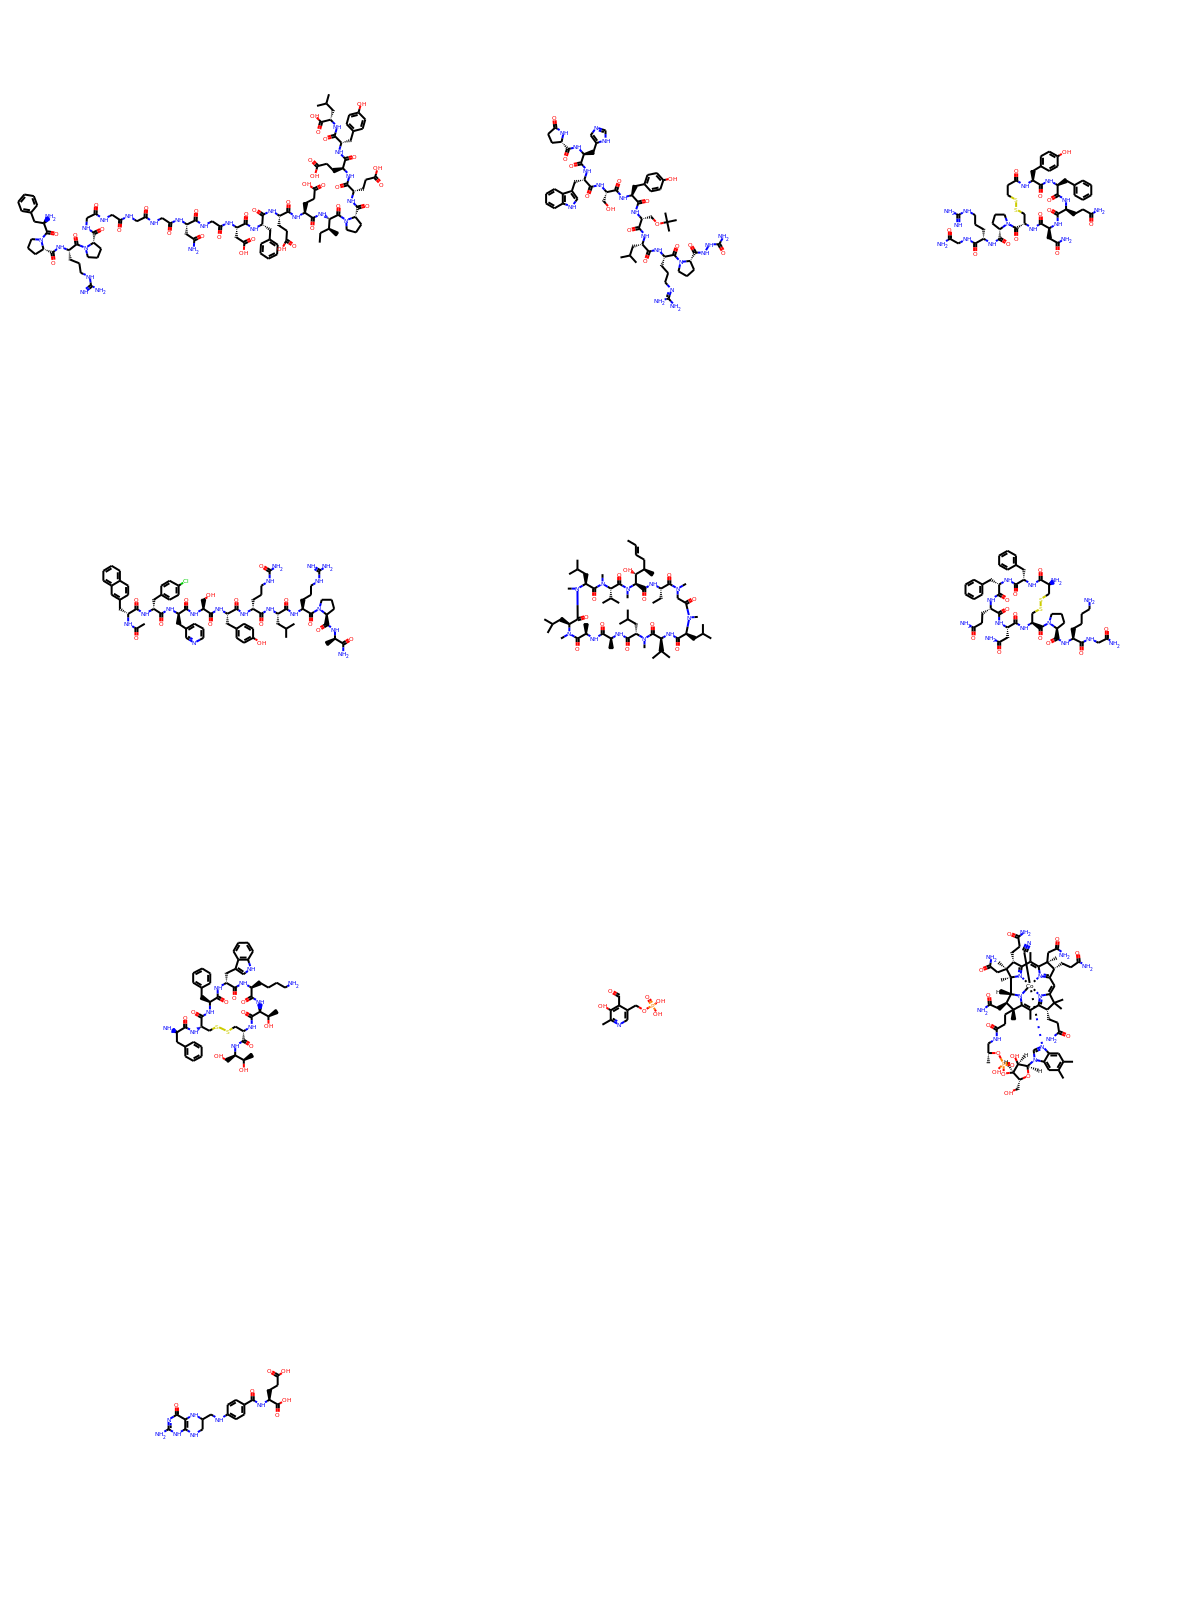

In [6]:
vzorek_neproslych = []
for i in range(0, 10):
    vzorek_neproslych.append(mols[i])


#m = [mols[0], mols[1], mols[2]]
Draw.MolsToGridImage(vzorek_neproslych, molsPerRow=3, subImgSize=(400, 400))

In [7]:
#parsování /data/pains_test.txt, načtení dvojic [pains struktura pomocí smarts, popis substruktury] do
#seznamu seznamů
pains = []
with open('../data/pains_pnl.txt', mode='r')as f:
    for line in f:
        struktura, popis = line.split("\t")
        pains.append([Chem.MolFromSmarts(struktura), popis.split("\"")[1]])

In [8]:
# vezme seznam substruktur a molekulu, vrati vektor boolu indikujici, zda molekula prislusnou substrukturu obsahuje
def apply_substructures(m, substructures):
    return [m.HasSubstructMatch(substructure) for substructure in substructures]

In [13]:
def get_substructure(m, substrucutres):
    for i in enumerate(substructures):
        if m.HasSubstructMatch(substructure):
            return substructures[i]
        

In [12]:
substructures = [zaznam[0] for zaznam in pains]
pain_positive = []
pain_negative = []
for m in mols:
    if any(apply_substructures(m, substructures)):
        pain_positive.append(m)
        
    else:
        pain_negative.append(m)

print("molekul obsahující nějakou z PAINS podstruktur:", len(pain_positive))
print("molekul NEobsahující žádnou z PAINS podstruktur: ", len(pain_negative))
print("celkem molekul: ", len(mols))


molekul obsahující nějakou z PAINS podstruktur: 16
molekul NEobsahující žádnou z PAINS podstruktur:  7094
celkem molekul:  7110


In [10]:
#Draw.MolToImage(pains[3], size=(1000, 1000), fitImage=True)

In [11]:
#pains_hits = [apply_substructures(m, pains) for m in mols]
#pro všechny molekuly načíst ho vektor patternů a apikovat a vyhledávat pomocí nich v nějakejch databázích a tak.. 
# 1) zjistit, kde vzali ty smarts nebo pains
# 2) zjistit načíst (naparsovat) je
# 3) aplikovat je na celej drugbank
#umět ty struktury zobrazit